# Análisis 2da Encuesta de inserción de científicos en Chile

**Autor:** Roberto Muñoz <br />
**E-mail:** <rmunoz@metricarts.com> <br />
**Github:** <https://github.com/rpmunoz> <br />

Análisis preliminar de la [2da Encuesta de inserción de científicos](https://www.anip.cl/encuesta-insercion-2018) llevada a cabo por el Centro de estudios de la ANIP. 

In [1]:
import os
import shutil
import numpy as np
import pandas as pd
from scipy import stats, integrate

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from IPython.core.display import display, HTML

%matplotlib inline
params = {'legend.fontsize': 'large',
          'figure.figsize': (8, 6),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'axes.titlepad': 16,
         'axes.titlesize': 20,
         'axes.labelpad': 16,
         'axes.labelsize': 16,
         'lines.linewidth': 3,
         'lines.markersize': 8,
         'xtick.labelsize': 12,
         'ytick.labelsize': 12}
plt.rcParams.update(params)

sns.despine()
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 100)

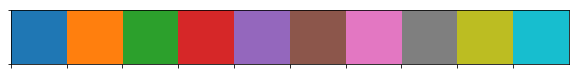

In [2]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [3]:
def autopct_generator(limit):
    def inner_autopct(pct):
        return ('%.1f%%' % pct) if pct > limit else ''
    return inner_autopct

## 1. Cargamos el nuevo archivo de datos

Revisaremos los valores de algunos campos

In [99]:
encuesta_clean_file="../encuesta/E2018-full-answers-clean.csv"

encuesta_full_df=pd.read_csv(encuesta_clean_file)
encuesta_full_df.head()

,ID de la respuesta,Fecha en que inició,Fecha de la ultima accion,¿Cuál es el grado académico más alto que has obtenido?,¿En qué disciplina y área clasificarías tu pregrado?,¿En qué disciplina y área clasificarías tu pregrado? [Otro],¿En qué año obtuviste tu pregrado?,¿En qué disciplina y área clasificarías tu {postgrado}?,¿En qué disciplina y área clasificarías tu {postgrado}? [Otro],¿En qué año obtuviste tu {postgrado}?,¿En qué lugar realizaste tu {postgrado}?,"En total, ¿cuántos artículos revisados por pares (peer-reviewed) has publicado en los últimos 5 años?","¿Cómo financiaste tus estudios de {postgrado}? [Fondos personales (e.g., ahorros, aporte familiar, etc.)]","¿Cómo financiaste tus estudios de {postgrado}? [Trabajo durante el estudio (e.g., pasantías, ayudantías, etc.)]","¿Cómo financiaste tus estudios de {postgrado}? [Fondos no personales nacionales (e.g., becas Conicyt, Becas Chile, premios, etc.)]","¿Cómo financiaste tus estudios de {postgrado}? [Fondos no personales extranjeros (e.g., becas o premios de universidad de estudios)]",¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Ayudantía(s) en mi área de estudio],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Ayudantía(s) en otra área de estudio],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Pasantía(s) en otros lugares de estudio o centros de investigación],"¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Trabajo en mi lugar de estudio, sin relación con mis estudios]",¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Trabajo fuera de mi lugar de estudio],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Trabajo remoto de cualquier tipo],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Otro],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Beca o premio (por favor indica el nombre de la beca o premio)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Crédito de un banco (por favor indica el nombre del banco)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario].1,¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Financiamiento de empleador (por favor indica el nombre del empleador)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario].2,¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Otro tipo de fondos (por favor indica qué tipo)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario].3,¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Beca o premio (por favor indica el nombre de la beca o premio)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Crédito de un banco (por favor indica el nombre del banco)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario].1,¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Financiamiento de empleador (por favor indica el nombre del empleador)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario].2,¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Otro tipo de fondos (por favor indica qué tipo)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario].3,¿Estás realizando o has realizado algún postdoctorado?,¿En qué disciplina y área clasificarías tu postdoctorado?,¿En qué disciplina y área clasificarías tu postdoctorado? [Otro],"¿En qué año terminaste tu postdoctorado? Si actuamente estás haciendo un postdoctorado, por favor responde ""Estoy haciendo un postdoctorado ahora"".",¿En qué lugar realizaste (o estás realizando) tu postdoctorado?,¿Has terminado más de un postdoctorado?,¿Cuántos postdoctorados has realizado?,¿Estás en Chile ahora?,¿Tuviste que renunciar a algún trabajo u oportunidad académica por volver a Chil

In [100]:
len(encuesta_full_df)

752

In [101]:
encuesta_full_df.dtypes.to_frame().transpose()

,ID de la respuesta,Fecha en que inició,Fecha de la ultima accion,¿Cuál es el grado académico más alto que has obtenido?,¿En qué disciplina y área clasificarías tu pregrado?,¿En qué disciplina y área clasificarías tu pregrado? [Otro],¿En qué año obtuviste tu pregrado?,¿En qué disciplina y área clasificarías tu {postgrado}?,¿En qué disciplina y área clasificarías tu {postgrado}? [Otro],¿En qué año obtuviste tu {postgrado}?,¿En qué lugar realizaste tu {postgrado}?,"En total, ¿cuántos artículos revisados por pares (peer-reviewed) has publicado en los últimos 5 años?","¿Cómo financiaste tus estudios de {postgrado}? [Fondos personales (e.g., ahorros, aporte familiar, etc.)]","¿Cómo financiaste tus estudios de {postgrado}? [Trabajo durante el estudio (e.g., pasantías, ayudantías, etc.)]","¿Cómo financiaste tus estudios de {postgrado}? [Fondos no personales nacionales (e.g., becas Conicyt, Becas Chile, premios, etc.)]","¿Cómo financiaste tus estudios de {postgrado}? [Fondos no personales extranjeros (e.g., becas o premios de universidad de estudios)]",¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Ayudantía(s) en mi área de estudio],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Ayudantía(s) en otra área de estudio],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Pasantía(s) en otros lugares de estudio o centros de investigación],"¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Trabajo en mi lugar de estudio, sin relación con mis estudios]",¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Trabajo fuera de mi lugar de estudio],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Trabajo remoto de cualquier tipo],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Otro],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Beca o premio (por favor indica el nombre de la beca o premio)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Crédito de un banco (por favor indica el nombre del banco)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario].1,¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Financiamiento de empleador (por favor indica el nombre del empleador)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario].2,¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Otro tipo de fondos (por favor indica qué tipo)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario].3,¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Beca o premio (por favor indica el nombre de la beca o premio)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Crédito de un banco (por favor indica el nombre del banco)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario].1,¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Financiamiento de empleador (por favor indica el nombre del empleador)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario].2,¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Otro tipo de fondos (por favor indica qué tipo)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario].3,¿Estás realizando o has realizado algún postdoctorado?,¿En qué disciplina y área clasificarías tu postdoctorado?,¿En qué disciplina y área clasificarías tu postdoctorado? [Otro],"¿En qué año terminaste tu postdoctorado? Si actuamente estás haciendo un postdoctorado, por favor responde ""Estoy haciendo un postdoctorado ahora"".",¿En qué lugar realizaste (o estás realizando) tu postdoctorado?,¿Has terminado más de un postdoctorado?,¿Cuántos postdoctorados has realizado?,¿Estás en Chile ahora?,¿Tuviste que renunciar a algún trabajo u oportunidad académica por volver a Chil

## 2. Análisis exploratorio

In [102]:
field_names_full=['¿Cuál es el grado académico más alto que has obtenido?',
                  '¿En qué año obtuviste tu pregrado?',
                  '¿En qué disciplina y área clasificarías tu pregrado?',
                  '¿En qué año obtuviste tu {postgrado}?',
                  '¿En qué disciplina y área clasificarías tu {postgrado}?',
                  '¿Estás realizando o has realizado algún postdoctorado?',
                  '¿En qué año terminaste tu postdoctorado? Si actuamente estás haciendo un postdoctorado, por favor responde "Estoy haciendo un postdoctorado ahora".',
                  '¿En qué disciplina y área clasificarías tu postdoctorado?',
                  '¿En qué lugar realizaste (o estás realizando) tu postdoctorado?',
                  'Actualmente, ¿tienes trabajo remunerado en Chile?',
                  'Actualmente, ¿estás buscando trabajo?',
                  '¿En qué institución o área realizas tu trabajo?',
                  '¿A qué sector económico pertenece este trabajo?',
                  '¿Qué tipo de relación laboral tienes en este trabajo?',
                  'Respecto de tu trabajo, ¿qué tan satisfecho estás con...? [Tu estabilidad laboral]',
                  'Respecto de tu trabajo, ¿qué tan satisfecho estás con...? [El reto intelectual que supone el trabajo]',
                  '¿Cuál es tu género?',
                  '¿Cuál es tu edad?',
                  '¿Cuál es tu nacionalidad? En caso de tener más de una nacionalidad, por favor escoge tu país de origen (donde naciste).',
                  'Finalmente, ¿cuál es tu opinión sobre el sistema de ciencia y tecnología en Chile, y sobre el proceso de inserción de científicos en Chile?']

field_names=['Grado académico',
             'Año obtención pregrado',
             'Area pregrado',
             'Año obtención postgrado',
             'Area postgrado',
             'Postdoctorado',
             "Año postdoctorado",
             'Area postdoctorado',
             'País postdoctorado',
             'Tiene trabajo remunerado',
             'Buscando trabajo',
             'Sector empleo',
             'Sector económico',
             'Tipo de contrato',
             'Estabilidad laboral',
             'Reto intelectual',
             'Genero',
             'Edad',
             'Nacionalidad',
             'Opinión sistema CTI']

encuesta_df=encuesta_full_df[field_names_full].copy()
encuesta_df.columns=field_names

encuesta_df.head()

,Grado académico,Año obtención pregrado,Area pregrado,Año obtención postgrado,Area postgrado,Postdoctorado,Año postdoctorado,Area postdoctorado,País postdoctorado,Tiene trabajo remunerado,Buscando trabajo,Sector empleo,Sector económico,Tipo de contrato,Estabilidad laboral,Reto intelectual,Genero,Edad,Nacionalidad,Opinión sistema CTI
0,Doctorado (PhD),2003,Ciencias Naturales:Ciencias Biológicas,2017,Ciencias Naturales:Ciencias Biológicas,No,NaN,NaN,NaN,Sí,NaN,Universidad pública/tradicional,Sector Primario:Pesca,Contrato con plazo fijo,6,6,Masculino,40.0,Chile,"Los fondos de financiamiento público de CyT actualmente son bajos, lo que aumenta la competivida..."
1,Doctorado (PhD),2004,Humanidades:Lenguaje y Literatura,2017,Humanidades:Lenguaje y Literatura,No,NaN,NaN,NaN,No,Sí,NaN,NaN,NaN,NaN,NaN,Femenino,37.0,Chile,Pésimo. Soy la única doctora en Chilenconó mi doctorado y estoy cesante. Me invitaron al congr...
2,Magíster (MSc),2014,Ciencias Sociales:Ciencias de la Educación,2018,Ciencias Médicas y de la Salud:Ciencias de la Salud,NaN,NaN,NaN,NaN,No,Sí,NaN,NaN,NaN,NaN,NaN,Masculino,36.0,Chile,"No existe el sistema. Lo que existe es la voluntad administrativa de mejorar las ciencias, pero ..."
3,Doctorado (PhD),2012,Ciencias Naturales:Ciencias Químicas,2016,Ciencias Naturales:Ciencias Químicas,Sí,Estoy haciendo un postdoctorado ahora,Ingeniería y Tecnología:Ingeniería Ambiental,Chile,Sí,NaN,Universidad pública/tradicional,Sector Cuaternario:Investigación científica,Contrato a honorario,2,7 (Muy satisfecho),Masculino,31.0,Chile,El proceso de inserción es muy deficiente considerando la cantidad de doctorandos que se están g...
4,Doctorado (PhD),2010,Ciencias Naturales:Matemáticas,2017,Ciencias Naturales:Matemáticas,No,NaN,NaN,NaN,Sí,NaN,Sector Empresarial,Sector Cuaternario:Tecnologías de la información,Contrato indefinido,7 (Muy satisfecho),4 (Ni satisfecho ni insatisfecho),Masculino,31.0,Chile,NaN


Seleccionamos solo a las personas con grado académico de Doctorado

In [103]:
encuesta_df=encuesta_df[encuesta_df['Grado académico']=='Doctorado (PhD)']
len(encuesta_df)

540

In [104]:
for field_name in field_names:
    print("Field: ", field_name)
    print(encuesta_df[field_name].unique())

Field:  Grado académico
['Doctorado (PhD)']
Field:  Año obtención pregrado
['2003' '2004' '2012' '2010' '2001' '2000' '2006' '2009' '2007' '2008'
 '2011' '2013' '2017' '2005' '2002' '1998' '1995' '2015' '1993' '1999'
 'Antes de 1990' '2016' '1996' '1997' '2014']
Field:  Area pregrado
['Ciencias Naturales:Ciencias Biológicas'
 'Humanidades:Lenguaje y Literatura' 'Ciencias Naturales:Ciencias Químicas'
 'Ciencias Naturales:Matemáticas'
 'Ciencias Naturales:Ciencias de la Tierra y Medioambientales'
 'Ciencias Sociales:Ciencias de la Educación'
 'Ciencias Naturales:Ciencias Físicas'
 'Ciencias Naturales:Computación y Ciencias de la Información'
 'Ciencias Médicas y de la Salud:Otra' 'Ciencias Sociales:Psicología'
 'Ingeniería y Tecnología:Ingeniería Química'
 'Ciencias Agrícolas:Ciencias Veterinarias'
 'Ingeniería y Tecnología:Ingeniería Eléctrica, Electrónica e Informática'
 'Otro' 'Ciencias Médicas y de la Salud:Ciencias de la Salud'
 'Humanidades:Filosofía, Ética y Religión' 'Humanidades

Revisamos categorias del campo año de obtención de pregrado y postgrado

In [105]:
encuesta_df.loc[encuesta_df['Año obtención pregrado']=='Antes de 1990','Año obtención pregrado']=1990
encuesta_df.loc[encuesta_df['Año obtención postgrado']=='Antes de 1990','Año obtención postgrado']=1990

Revisamos los casos en que la persona reporta que obtuvo el postgrado dos años despues del pregrado

In [106]:
encuesta_df['Año obtención pregrado'] = encuesta_df['Año obtención pregrado'].astype(int)
encuesta_df['Año obtención postgrado'] = encuesta_df['Año obtención postgrado'].astype(int)

pregrado_incorrecto = (encuesta_df['Año obtención postgrado']-encuesta_df['Año obtención pregrado']) < 3
print("Numero de pregrado incorrecto: ", len(encuesta_df[pregrado_incorrecto]))
encuesta_df.loc[pregrado_incorrecto,'Año obtención pregrado'] = 0

Numero de pregrado incorrecto:  17


In [107]:
encuesta_df['Año postdoctorado'].unique()

array([nan, 'Estoy haciendo un postdoctorado ahora', '2016', '2015',
       '2017', '2012', '2014', '2011', '2009', '2013', '1991',
       'Antes de 1990', '2010', '2007', '2005', '2008', '2004'], dtype=object)

## Revisamos categorias del campo situación laboral

In [113]:
encuesta_df['Situacion laboral']=np.NaN
encuesta_df.loc[encuesta_df['Tiene trabajo remunerado']=='Sí','Situacion laboral']='Ocupado'
encuesta_df.loc[encuesta_df['Tiene trabajo remunerado']=='No','Situacion laboral']='Desempleado'
encuesta_df.loc[(encuesta_df['Tiene trabajo remunerado']=='No') & (encuesta_df['Buscando trabajo']=='No'),'Situacion laboral']='Inactivo'

In [115]:
encuesta_df.groupby('Situacion laboral').size()

Situacion laboral
Desempleado     82
Inactivo        26
Ocupado        407
dtype: int64

## Análisis de Postdoctorado

In [116]:
encuesta_df['País postdoctorado'].unique()

array([nan, 'Chile', 'Canadá', 'Suecia', 'Francia', 'Irlanda', 'Bélgica',
       'España', 'México', 'Estados Unidos de América', 'Alemania',
       'Argentina', 'Reino Unido', 'Países Bajos', 'Brasil',
       'Nueva Zelanda', 'Noruega', 'Australia', 'Suiza', 'Italia'], dtype=object)

In [118]:
encuesta_df['Año postdoctorado'].unique()

array([nan, 'Estoy haciendo un postdoctorado ahora', '2016', '2015',
       '2017', '2012', '2014', '2011', '2009', '2013', '1991',
       'Antes de 1990', '2010', '2007', '2005', '2008', '2004'], dtype=object)

In [117]:
encuesta_df.groupby(['Situacion laboral','Postdoctorado']).size()

Situacion laboral  Postdoctorado
Desempleado        No                52
                   Sí                30
Inactivo           No                 8
                   Sí                18
Ocupado            No               185
                   Sí               222
dtype: int64

In [119]:
pd.DataFrame(encuesta_df[encuesta_df['Año postdoctorado']=='Estoy haciendo un postdoctorado ahora'].groupby(['Situacion laboral','Postdoctorado']).size())

,,0
Situacion laboral,Postdoctorado,
Desempleado,Sí,14
Inactivo,Sí,13
Ocupado,Sí,91


In [120]:
pd.DataFrame(encuesta_df[encuesta_df['Año postdoctorado']=='Estoy haciendo un postdoctorado ahora'].groupby(['Situacion laboral','Postdoctorado','País postdoctorado']).size())

0
Situacion laboral Postdoctorado País postdoctorado           
Desempleado       Sí            Alemania                    2
                                Brasil                      1
                                Canadá                      1
                                Chile                       2
                                España                      1
                                Estados Unidos de América   5
                                México                      1
                                Suecia                      1
Inactivo          Sí            Alemania                    1
                                Argentina                   1
                                Bélgica                     1
                                Chile                       2
                                Estados Unidos de América   3
                                Irlanda                     1
                                Reino Unido                 3
                                Suiza                       1
Ocupado           Sí            Chile                      89
                                España                      1
                                Estados Unidos de América   1

Algunas personas indicaron estar haciendo un postdoctorado ahora, por lo cual están ocupados

In [121]:
encuesta_df.loc[encuesta_df['Año postdoctorado']=='Estoy haciendo un postdoctorado ahora','Situacion laboral']='Ocupado'

In [123]:
encuesta_df.groupby('Situacion laboral').size()

Situacion laboral
Desempleado     68
Inactivo        13
Ocupado        446
dtype: int64

Revisamos categorias del campo estabilidad laboral

In [124]:
encuesta_df.loc[encuesta_df['Estabilidad laboral']=='1 (Muy insatisfecho)','Estabilidad laboral']='1'
encuesta_df.loc[encuesta_df['Estabilidad laboral']=='4 (Ni satisfecho ni insatisfecho)','Estabilidad laboral']='4'
encuesta_df.loc[encuesta_df['Estabilidad laboral']=='7 (Muy satisfecho)','Estabilidad laboral']='7'

Revisamos categorias del campo Reto intelectual

In [125]:
encuesta_df.loc[encuesta_df['Reto intelectual']=='1 (Muy insatisfecho)','Reto intelectual']='1'
encuesta_df.loc[encuesta_df['Reto intelectual']=='4 (Ni satisfecho ni insatisfecho)','Reto intelectual']='4'
encuesta_df.loc[encuesta_df['Reto intelectual']=='7 (Muy satisfecho)','Reto intelectual']='7'

Agregamos la categoria inactivo al campo 'Tiene trabajo remunerado'. Es útil para identificar a personas que responden No en 'Buscando trabajo'

In [126]:
field_dtypes={'Grado académico':'category',
              'Año obtención pregrado':int,
              'Año obtención postgrado':int,
              'Tiene trabajo remunerado':'category',
              'Buscando trabajo':'category',
              'Situacion laboral':'category',
              'Sector empleo':'category',
              'Estabilidad laboral':'category',
              'Reto intelectual':'category',
              'Genero':'category',
              'Edad':float,
              'Nacionalidad':'category'}

for name, dtype in field_dtypes.items():
    encuesta_df[name] = encuesta_df[name].astype(dtype)
    
encuesta_df['Situacion laboral']=pd.Categorical(encuesta_df['Situacion laboral'], ["Ocupado", "Desempleado", "Inactivo"], ordered=True)

In [127]:
len(encuesta_df)

540

# 2.1 Análisis demográfico

In [30]:
encuesta_df.groupby('Genero').size()

Genero
Femenino                 228
Masculino                295
Otro (no binario)          2
Prefiero no responder     15
dtype: int64

In [31]:
age_bins=[0, 34, 44, 54, 64, 69]
age_labels=['< 35 años', '35-44 años', '45-54 años', '55-64 años', '65-69 años']
encuesta_df['Grupo etario']=pd.cut(encuesta_df['Edad'], age_bins, labels=age_labels)

data_plot=encuesta_df.groupby('Genero')['Grupo etario'].value_counts().unstack('Genero')
data_plot=data_plot.reindex(age_labels)
data_plot

Genero,Femenino,Masculino,Otro (no binario),Prefiero no responder
Grupo etario,,,,
< 35 años,84.0,113.0,NaN,3.0
35-44 años,121.0,159.0,1.0,7.0
45-54 años,10.0,11.0,NaN,NaN
55-64 años,1.0,1.0,NaN,NaN
65-69 años,1.0,NaN,NaN,NaN


In [32]:
data_plot.sum().sum()

512.0

In [33]:
data_plot_pct=(100*data_plot/data_plot.sum().sum()).round(1)
data_plot_pct

Genero,Femenino,Masculino,Otro (no binario),Prefiero no responder
Grupo etario,,,,
< 35 años,16.4,22.1,NaN,0.6
35-44 años,23.6,31.1,0.2,1.4
45-54 años,2.0,2.1,NaN,NaN
55-64 años,0.2,0.2,NaN,NaN
65-69 años,0.2,NaN,NaN,NaN


In [34]:
data_plot_pct.sum(axis=0)

Genero
Femenino                 42.4
Masculino                55.5
Otro (no binario)         0.2
Prefiero no responder     2.0
dtype: float64

In [35]:
data_plot_pct.sum(axis=1)

Grupo etario
< 35 años     39.1
35-44 años    56.3
45-54 años     4.1
55-64 años     0.4
65-69 años     0.2
dtype: float64

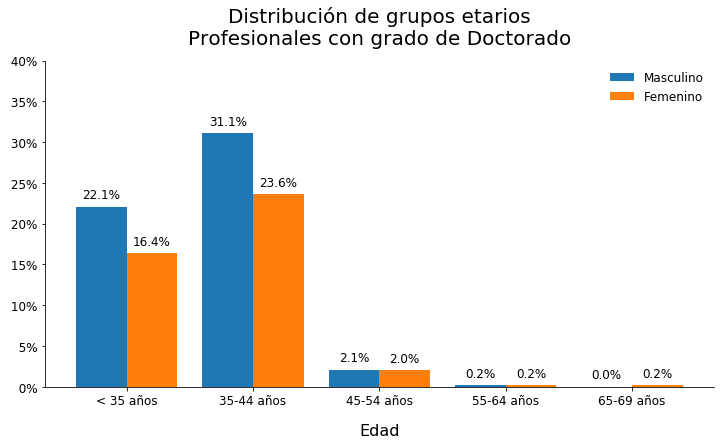

In [37]:
plot_classes=["Masculino","Femenino"]

fig, ax = plt.subplots(1,1, figsize=(12,6))
data_plot_pct[plot_classes].plot(kind='bar', ax=ax,
               fontsize=12, rot=0, width=0.8)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(frameon=False)

ax.set_ylim(0,40)
ax.set_xlabel('Edad')
plt.title("Distribución de grupos etarios\nProfesionales con grado de Doctorado")

vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals])

for p in ax.patches:
    ax.annotate("{:.1f}%".format(p.get_height()), (p.get_x() + 0.2, p.get_height() + 1),
               fontsize=12, horizontalalignment='center')

plt.savefig('figures/doctorado/figura_1_distribucion_grupo_etario.png', bbox_inches='tight')
plt.savefig('figures/doctorado/figura_1_distribucion_grupo_etario.pdf', bbox_inches='tight')

## 4.2 Año obtención de pregrado

In [17]:
data_plot=pd.DataFrame(encuesta_df.groupby('Año obtención pregrado').size(), columns=['Número de egresados'])
data_plot=data_plot[data_plot.index > 0]
data_plot.head()

,Número de egresados
Año obtención pregrado,
1990,3
1993,1
1995,5
1996,8
1997,6


In [18]:
data_plot['Percentage']=(100*data_plot/data_plot.sum().sum()).round(2)
data_plot.head()

,Número de egresados,Percentage
Año obtención pregrado,,
1990,3,0.57
1993,1,0.19
1995,5,0.96
1996,8,1.53
1997,6,1.15


In [19]:
data_plot['CumSum']=data_plot['Percentage'].cumsum()
data_plot.head()

,Número de egresados,Percentage,CumSum
Año obtención pregrado,,,
1990,3,0.57,0.57
1993,1,0.19,0.76
1995,5,0.96,1.72
1996,8,1.53,3.25
1997,6,1.15,4.40


In [20]:
data_plot['CumSum']

Año obtención pregrado
1990      0.57
1993      0.76
1995      1.72
1996      3.25
1997      4.40
1998      6.31
1999      7.65
2000      9.75
2001     13.57
2002     17.78
2003     23.90
2004     30.78
2005     39.96
2006     50.29
2007     64.25
2008     74.96
2009     82.61
2010     91.41
2011     95.81
2012     99.06
2013     99.63
2014    100.01
Name: CumSum, dtype: float64

In [28]:
print(data_plot.loc[2007:,'Percentage'].sum())
print(data_plot.loc[2007:,"Número de egresados"].sum())

print("Total de magister que reportan año pregrado: ", data_plot["Número de egresados"].sum())

49.72
260
Total de magister que reportan año pregrado:  523


In [29]:
encuesta_df[encuesta_df['Año obtención pregrado']>0]['Año obtención pregrado'].median()

2006.0

In [21]:
quartile_bins=[0, 25, 50, 75, 101]
quartile_labels=['q1', 'q2', 'q3', 'q4']
data_plot['Quartile']=pd.cut(data_plot['CumSum'], quartile_bins, labels=quartile_labels)
data_plot.head()

,Número de egresados,Percentage,CumSum,Quartile
Año obtención pregrado,,,,
1990,3,0.57,0.57,q1
1993,1,0.19,0.76,q1
1995,5,0.96,1.72,q1
1996,8,1.53,3.25,q1
1997,6,1.15,4.40,q1


In [22]:
colors = {'q1':current_palette[0],'q2':current_palette[1],'q3':current_palette[2],'q4':current_palette[3]}
data_plot['color'] = data_plot['Quartile'].map(colors)
data_plot.head()

,Número de egresados,Percentage,CumSum,Quartile,color
Año obtención pregrado,,,,,
1990,3,0.57,0.57,q1,"(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)"
1993,1,0.19,0.76,q1,"(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)"
1995,5,0.96,1.72,q1,"(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)"
1996,8,1.53,3.25,q1,"(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)"
1997,6,1.15,4.40,q1,"(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)"


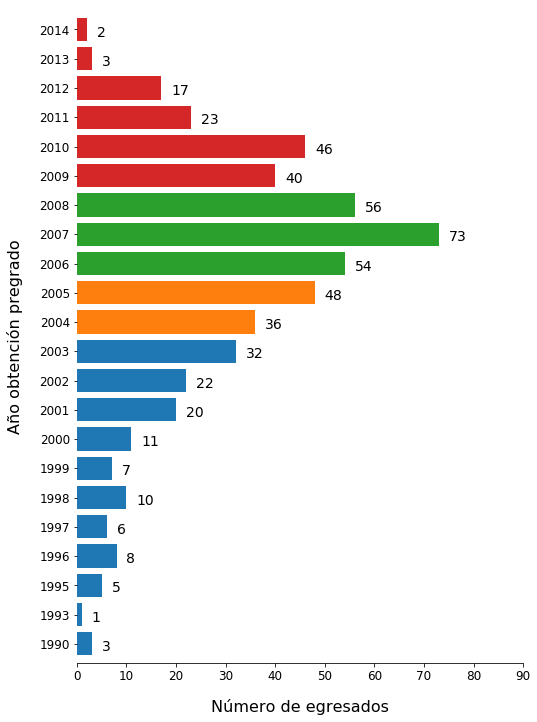

In [23]:
plot_field="Número de egresados"

fig, ax = plt.subplots(1,1, figsize=(8,12))
data_plot[plot_field].plot(kind='barh', ax=ax,
               fontsize=12, rot=0, width=0.8, color=data_plot['color'])

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlim(0,90)
ax.set_xlabel('Número de egresados')

for p in ax.patches:
    ax.annotate("{:d}".format(p.get_width()), (p.get_width() + 2, p.get_y()+0.3),
               fontsize=14, horizontalalignment='left', verticalalignment='center')
   
plt.savefig('figures/doctorado/figura_2_año_obtencion_pregrado.jpg', bbox_inches='tight')
plt.savefig('figures/doctorado/figura_2_año_obtencion_pregrado.pdf', bbox_inches='tight')

In [67]:
#encuesta_df.style.set_properties(subset=['Opinión sistema CTI'], **{'width': '300px'})
#encuesta_df[encuesta_df['Año obtención pregrado']==2017]

In [68]:
#encuesta_df[(encuesta_df['Año obtención postgrado']-encuesta_df['Año obtención pregrado']) < 3]

## 4.2 Año obtención de postgrado

In [275]:
data_plot=pd.DataFrame(encuesta_df.groupby('Año obtención postgrado').size(), columns=['Número de egresados'])
data_plot.head()

,Número de egresados
Año obtención postgrado,
1990,2
1998,1
2002,1
2003,3
2004,3


In [276]:
data_plot['Percentage']=(100*data_plot/data_plot.sum().sum()).round(2)
data_plot.head()

,Número de egresados,Percentage
Año obtención postgrado,,
1990,2,0.37
1998,1,0.19
2002,1,0.19
2003,3,0.56
2004,3,0.56


In [277]:
data_plot['CumSum']=data_plot['Percentage'].cumsum()
data_plot.head()

,Número de egresados,Percentage,CumSum
Año obtención postgrado,,,
1990,2,0.37,0.37
1998,1,0.19,0.56
2002,1,0.19,0.75
2003,3,0.56,1.31
2004,3,0.56,1.87


In [278]:
quartile_bins=[0, 25, 50, 75, 101]
quartile_labels=['q1', 'q2', 'q3', 'q4']
data_plot['Quartile']=pd.cut(data_plot['CumSum'], quartile_bins, labels=quartile_labels)
data_plot.head()

,Número de egresados,Percentage,CumSum,Quartile
Año obtención postgrado,,,,
1990,2,0.37,0.37,q1
1998,1,0.19,0.56,q1
2002,1,0.19,0.75,q1
2003,3,0.56,1.31,q1
2004,3,0.56,1.87,q1


In [279]:
colors = {'q1':current_palette[0],'q2':current_palette[1],'q3':current_palette[2],'q4':current_palette[3]}
data_plot['color'] = data_plot['Quartile'].map(colors)
data_plot.head()

,Número de egresados,Percentage,CumSum,Quartile,color
Año obtención postgrado,,,,,
1990,2,0.37,0.37,q1,"(0.12156862745098039, 0.4666666666666667, 0.70..."
1998,1,0.19,0.56,q1,"(0.12156862745098039, 0.4666666666666667, 0.70..."
2002,1,0.19,0.75,q1,"(0.12156862745098039, 0.4666666666666667, 0.70..."
2003,3,0.56,1.31,q1,"(0.12156862745098039, 0.4666666666666667, 0.70..."
2004,3,0.56,1.87,q1,"(0.12156862745098039, 0.4666666666666667, 0.70..."


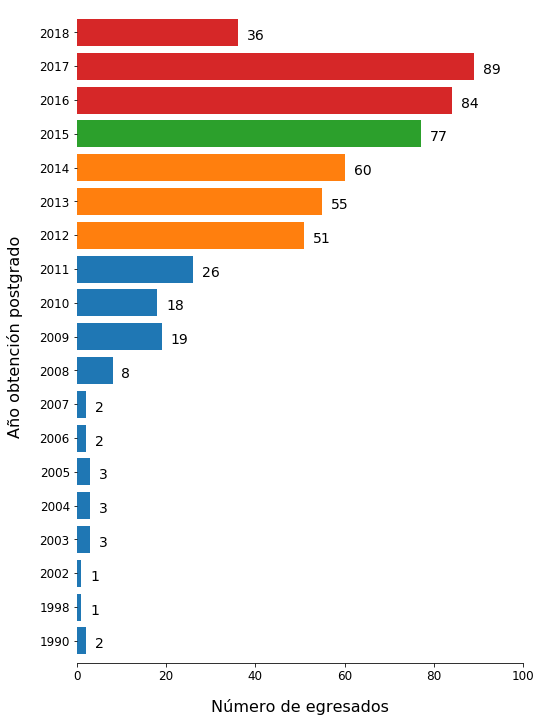

In [281]:
plot_field="Número de egresados"

fig, ax = plt.subplots(1,1, figsize=(8,12))
data_plot[plot_field].plot(kind='barh', ax=ax,
               fontsize=12, rot=0, width=0.8, color=data_plot['color'])

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlim(0,100)
ax.set_xlabel('Número de egresados')

for p in ax.patches:
    ax.annotate("{:d}".format(p.get_width()), (p.get_width() + 2, p.get_y()+0.3),
               fontsize=14, horizontalalignment='left', verticalalignment='center')

plt.savefig('figures/doctorado/figura_3_año_obtencion_postgrado.jpg', bbox_inches='tight')
plt.savefig('figures/doctorado/figura_3_año_obtencion_postgrado.pdf', bbox_inches='tight')

## 4.3 Situación laboral

In [145]:
data_plot=encuesta_df.groupby('Genero')['Situacion laboral'].value_counts().unstack('Genero')
data_plot=data_plot.reindex(['Ocupado','Desempleado','Inactivo'])
data_plot

Genero,Femenino,Masculino,Otro (no binario),Prefiero no responder
Situacion laboral,,,,
Ocupado,187.0,248.0,2.0,9.0
Desempleado,37.0,27.0,NaN,4.0
Inactivo,1.0,11.0,NaN,1.0


In [146]:
data_plot.sum().sum()

527.0

In [147]:
data_plot_pct=(100*data_plot/data_plot.sum()).round(1)
data_plot_pct.head()

Genero,Femenino,Masculino,Otro (no binario),Prefiero no responder
Situacion laboral,,,,
Ocupado,83.1,86.7,100.0,64.3
Desempleado,16.4,9.4,NaN,28.6
Inactivo,0.4,3.8,NaN,7.1


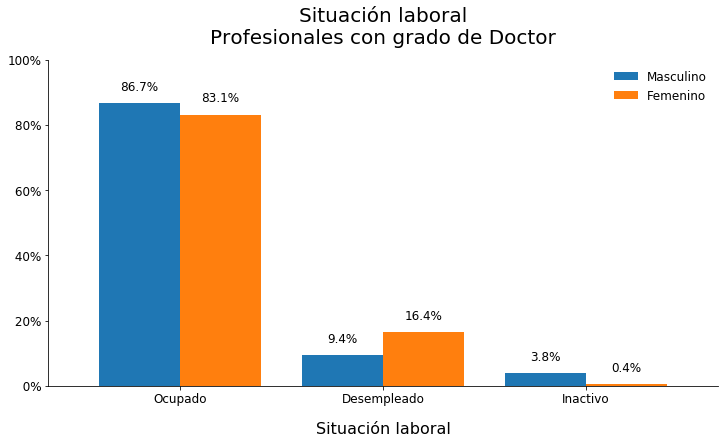

In [148]:
plot_classes=["Masculino","Femenino"]

fig, ax = plt.subplots(1,1, figsize=(12,6))
data_plot_pct[plot_classes].plot(kind='bar', ax=ax,
               fontsize=12, rot=0, width=0.8)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(frameon=False)

ax.set_ylim(0,100)
ax.set_xlabel('Situación laboral')
plt.title("Situación laboral\nProfesionales con grado de Doctor")

vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals])

for p in ax.patches:
    ax.annotate("{:.1f}%".format(p.get_height()), (p.get_x() + 0.2, p.get_height() + 4),
               fontsize=12, horizontalalignment='center')

plt.savefig('figures/doctorado/figura_4_situacion_laboral_genero.png', bbox_inches='tight')
plt.savefig('figures/doctorado/figura_4_situacion_laboral_genero.pdf', bbox_inches='tight')

## Repetimos análisis pero sin separar por género

In [149]:
data_plot=encuesta_df.groupby('Situacion laboral').size()
data_plot=data_plot.reindex(['Ocupado','Desempleado','Inactivo'])
data_plot

Situacion laboral
Ocupado        446
Desempleado     68
Inactivo        13
dtype: int64

In [150]:
data_plot_pct=(100*data_plot/data_plot.sum()).round(1)
data_plot_pct.head()

Situacion laboral
Ocupado        84.6
Desempleado    12.9
Inactivo        2.5
dtype: float64

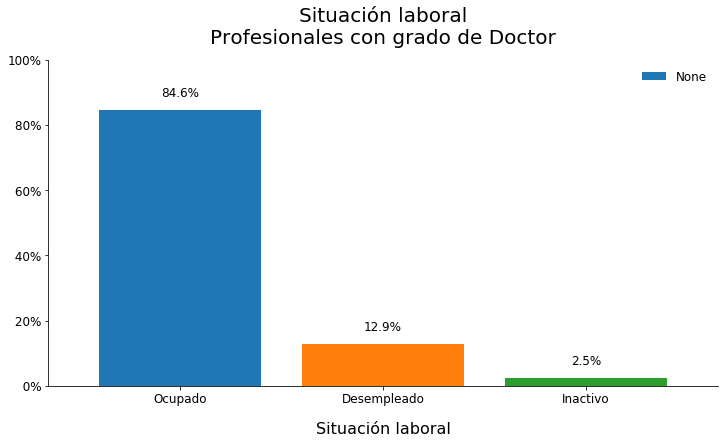

In [152]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
data_plot_pct.plot(kind='bar', ax=ax,
               fontsize=12, rot=0, width=0.8)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(frameon=False)

ax.set_ylim(0,100)
ax.set_xlabel('Situación laboral')
plt.title("Situación laboral\nProfesionales con grado de Doctor")

vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals])

for p in ax.patches:
    ax.annotate("{:.1f}%".format(p.get_height()), (p.get_x() + 0.4, p.get_height() + 4),
               fontsize=12, horizontalalignment='center')

plt.savefig('figures/doctorado/figura_4_situacion_laboral.png', bbox_inches='tight')
plt.savefig('figures/doctorado/figura_4_situacion_laboral.pdf', bbox_inches='tight')

In [153]:
data_plot=encuesta_df.groupby('Grado académico')['Sector empleo'].value_counts().unstack('Grado académico').sort_values(by='Doctorado (PhD)', ascending=False)
data_plot

Grado académico,Doctorado (PhD)
Sector empleo,
Universidad pública/tradicional,223
Universidad Privada,98
Centro de investigación,38
Sector Empresarial,21
Otro,10
Administración pública,7
Trabajador independiente,6
Institución sin fines de lucro,2
Instituto Profesional,2


No handles with labels found to put in legend.


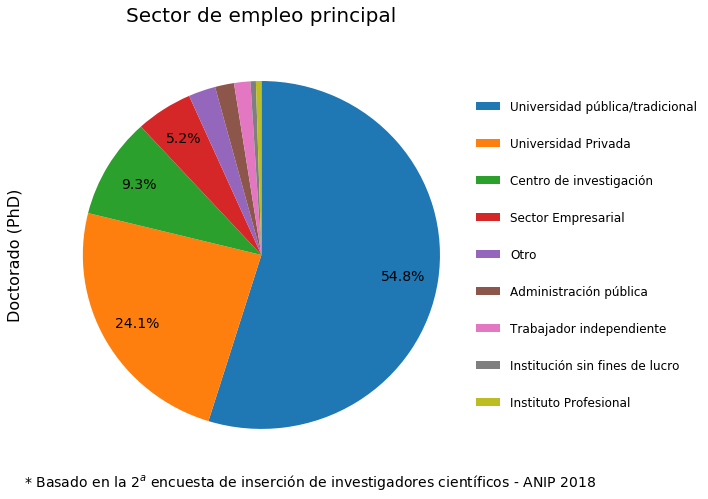

In [161]:
fig, ax = plt.subplots(n_row,n_col, figsize=(8,8))

data_plot.plot(kind='pie', ax=ax, autopct=autopct_generator(3), labels=['']*len(data_plot.index),
               pctdistance=0.8, labeldistance=1.2,
               startangle=90, counterclock=False,
               fontsize=14, subplots=True)
                                                
plt.legend(labels=data_plot.index, loc='center right',
           bbox_to_anchor=(1.5,0.5), labelspacing=2,
           frameon=False)

ax.set_title('Sector de empleo principal', fontsize=20)
ax.legend(labels=data_plot.index, loc='center right',
           bbox_to_anchor=(1.5,0.5), labelspacing=2,
           frameon=False)
    
plt.figtext(0.1, 0.1, '* Basado en la $2^{a}$ encuesta de inserción de investigadores científicos - ANIP 2018', horizontalalignment='left', size=14)

plt.savefig('figures/doctorado/figura_5_sector_empleo.png', bbox_inches='tight')
plt.savefig('figures/doctorado/figura_5_sector_empleo.pdf', bbox_inches='tight')

## 4.3 Tipos de contratos por sector

In [75]:
data_plot=encuesta_df.groupby(['Grado académico','Sector empleo'])['Tipo de contrato'].value_counts().unstack(['Grado académico','Sector empleo'])#.sort_values(by='Doctorado (PhD)', ascending=False)
data_plot

Grado académico                               Doctorado (PhD)  \
Sector empleo                          Administración pública   
Tipo de contrato                                                
A honorarios ("Boletear sin contrato")                    NaN   
Acuerdo de palabra                                        NaN   
Contrato a honorario                                      4.0   
Contrato con plazo fijo                                   3.0   
Contrato indefinido                                       NaN   
Independiente                                             NaN   
Otro                                                      NaN   
Sin contrato                                              NaN   

Grado académico                                                 \
Sector empleo                          Centro de investigación   
Tipo de contrato                                                 
A honorarios ("Boletear sin contrato")                     8.0   
Acuerdo de palabra                                         NaN   
Contrato a honorario                                       8.0   
Contrato con plazo fijo                                    8.0   
Contrato indefinido                                       10.0   
Independiente                                              1.0   
Otro                                                       2.0   
Sin contrato                                               1.0   

Grado académico                                                        \
Sector empleo                          Institución sin fines de lucro   
Tipo de contrato                                                        
A honorarios ("Boletear sin contrato")                            NaN   
Acuerdo de palabra                                                NaN   
Contrato a honorario                                              NaN   
Contrato con plazo fijo                                           1.0   
Contrato indefinido                                               1.0   
Independiente                                                     NaN   
Otro                                                              NaN   
Sin contrato                                                      NaN   

Grado académico                                                    \
Sector empleo                          Instituto Profesional Otro   
Tipo de contrato                                                    
A honorarios ("Boletear sin contrato")                   NaN  NaN   
Acuerdo de palabra                                       NaN  NaN   
Contrato a honorario                                     NaN  2.0   
Contrato con plazo fijo                                  1.0  3.0   
Contrato indefinido                                      1.0  5.0   
Independiente                                            NaN  NaN   
Otro                                                     NaN  NaN   
Sin contrato                                             NaN  NaN   

Grado académico                                            \
Sector empleo                          Sector Empresarial   
Tipo de contrato                                            
A honorarios ("Boletear sin contrato")                1.0   
Acuerdo de palabra                                    NaN   
Contrato a honorario                                  2.0   
Contrato con plazo fijo                               3.0   
Contrato indefinido                                  15.0   
Independiente                                         NaN   
Otro                                                  NaN   
Sin contrato                                          NaN   

Grado académico                                                  \
Sector empleo                          Trabajador independiente   
Tipo de contrato                                                  
A honorarios ("Boletear sin contrato")                      NaN   
Acuerdo de palabra                                   

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


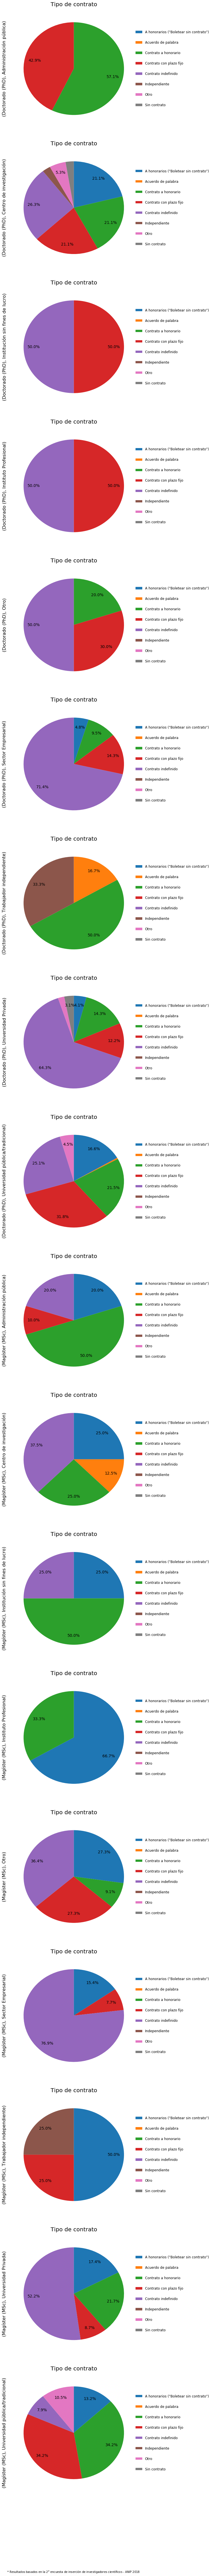

In [46]:
n_row=int(len(data_plot.columns))
n_col=1

fig, axarr = plt.subplots(n_row,n_col, figsize=(8*n_col,(8+1)*n_row))
data_plot.plot(kind='pie', ax=axarr,
               autopct=autopct_generator(3), labels=['']*len(data_plot.index),
               pctdistance=0.8, labeldistance=1.2,
               startangle=90, counterclock=False,
               fontsize=14, subplots=True)

#ax. title('Sector de empleo principal', fontsize=20)
for ax in axarr.reshape(-1):
    ax.set_title('Tipo de contrato', fontsize=20)
    ax.legend(labels=data_plot.index, loc='center right',
               bbox_to_anchor=(1.6,0.5), labelspacing=2,
               frameon=False)

plt.figtext(0.1, 0.1, '* Resultados basados en la $2^{a}$ encuesta de inserción de investigadores científicos - ANIP 2018', horizontalalignment='left')

plt.savefig('figures/figura_3_tipo_de_contrato.jpg', bbox_inches='tight')
plt.savefig('figures/figura_3_tipo_de_contrato.pdf', bbox_inches='tight')

In [85]:
data_plot=encuesta_df.groupby(['Grado académico','Sector empleo'])['Tipo de contrato'].value_counts().unstack(['Grado académico','Sector empleo'])#.sort_values(by='Doctorado (PhD)', ascending=False)
data_plot=data_plot.loc[:,(slice(None),'Universidad pública/tradicional')]

No handles with labels found to put in legend.
No handles with labels found to put in legend.


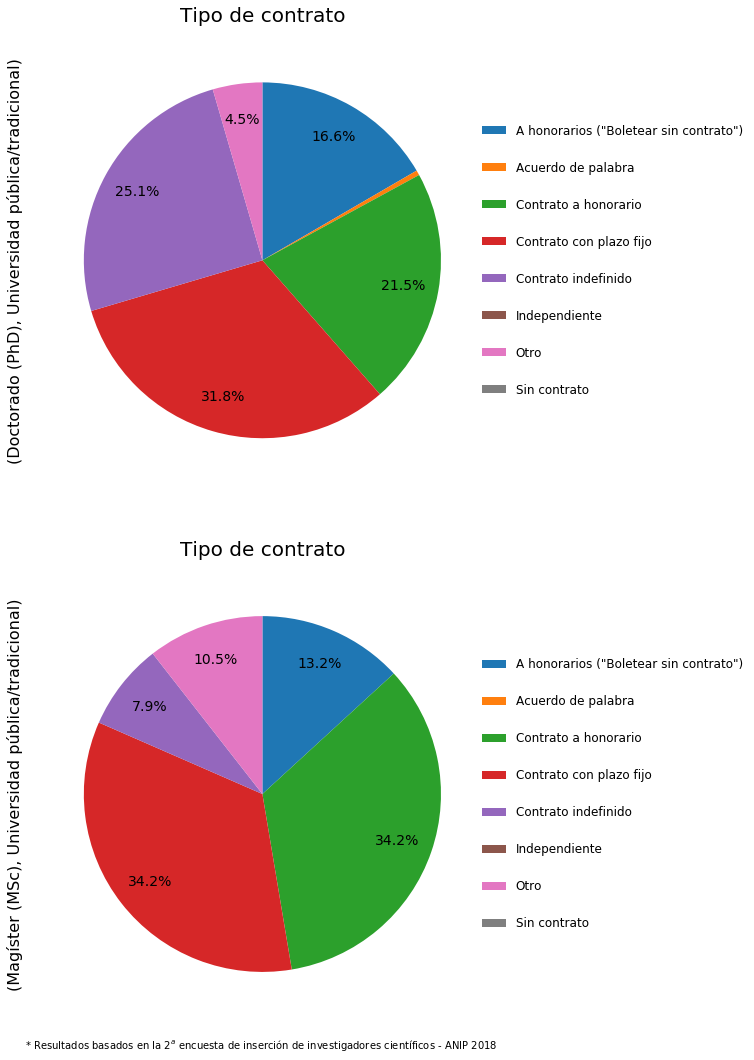

In [86]:
n_row=int(len(data_plot.columns))
n_col=1

fig, axarr = plt.subplots(n_row,n_col, figsize=(8*n_col,(8+1)*n_row))
data_plot.plot(kind='pie', ax=axarr,
               autopct=autopct_generator(3), labels=['']*len(data_plot.index),
               pctdistance=0.8, labeldistance=1.2,
               startangle=90, counterclock=False,
               fontsize=14, subplots=True)

#ax. title('Sector de empleo principal', fontsize=20)
for ax in axarr.reshape(-1):
    ax.set_title('Tipo de contrato', fontsize=20)
    ax.legend(labels=data_plot.index, loc='center right',
               bbox_to_anchor=(1.6,0.5), labelspacing=2,
               frameon=False)

plt.figtext(0.1, 0.1, '* Resultados basados en la $2^{a}$ encuesta de inserción de investigadores científicos - ANIP 2018', horizontalalignment='left')

plt.savefig('figures/figura_4_tipo_de_contrato_Universidad.jpg', bbox_inches='tight')
plt.savefig('figures/figura_4_tipo_de_contrato_Universidad.pdf', bbox_inches='tight')

# 4.4 Análisis calidad trabajo

In [171]:
data_plot=encuesta_df.groupby('Grado académico')['Estabilidad laboral'].value_counts().unstack('Grado académico')
data_plot

Grado académico,Doctorado (PhD),Magíster (MSc)
Estabilidad laboral,,
1,91,32
2,34,7
3,38,12
4,41,17
5,46,15
6,65,13
7,92,18


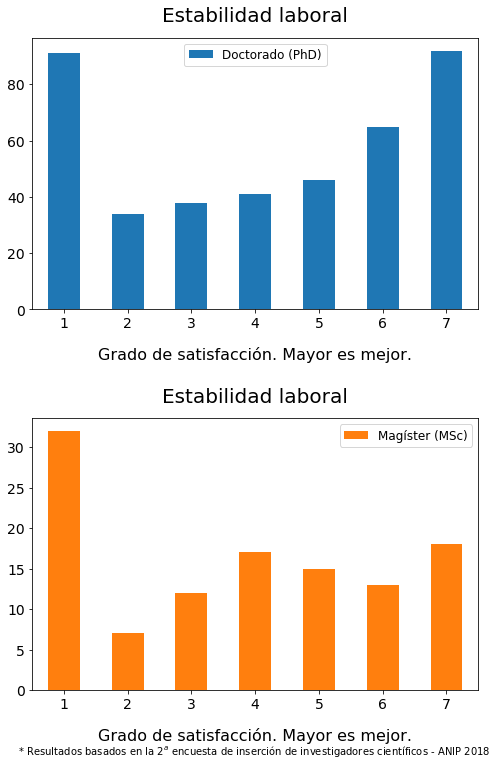

In [172]:
n_row=int(len(data_plot.columns))
n_col=1

fig, axarr = plt.subplots(n_row,n_col, figsize=(8*n_col,6*n_row))
data_plot.plot(kind='bar', ax=axarr, rot=0,
               fontsize=14, subplots=True)

plt.subplots_adjust(hspace=0.4)
plt.figtext(0.1, 0.05, '* Resultados basados en la $2^{a}$ encuesta de inserción de investigadores científicos - ANIP 2018', horizontalalignment='left')

for ax in axarr.reshape(-1):
    ax.set_title('Estabilidad laboral', fontsize=20)
    ax.set_xlabel('Grado de satisfacción. Mayor es mejor.')

plt.savefig('figures/figura_5_estabilidad_laboral.jpg', bbox_inches='tight')
plt.savefig('figures/figura_5_estabilidad_laboral.pdf', bbox_inches='tight')

In [173]:
data_plot=encuesta_df.groupby('Grado académico')['Reto intelectual'].value_counts().unstack('Grado académico')
data_plot

Grado académico,Doctorado (PhD),Magíster (MSc)
Reto intelectual,,
1,17,11
2,13,7
3,21,6
4,36,16
5,57,20
6,91,31
7,172,23


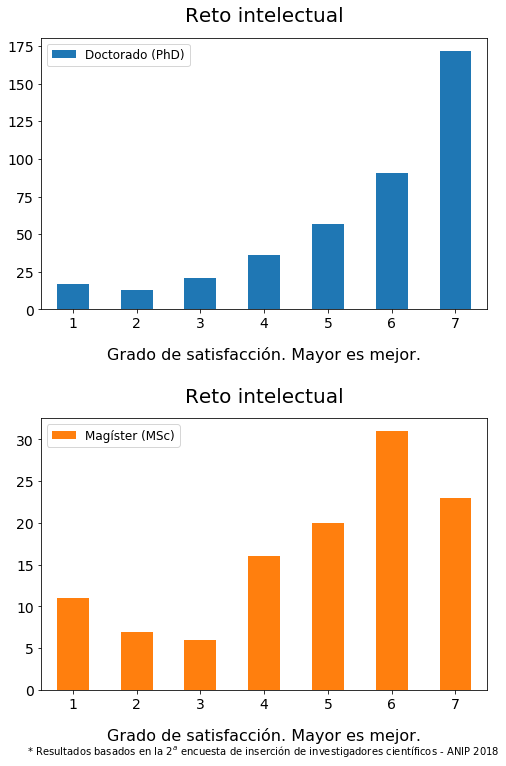

In [174]:
n_row=int(len(data_plot.columns))
n_col=1

fig, axarr = plt.subplots(n_row,n_col, figsize=(8*n_col,6*n_row))
data_plot.plot(kind='bar', ax=axarr, rot=0,
               fontsize=14, subplots=True)

plt.subplots_adjust(hspace=0.4)
plt.figtext(0.1, 0.05, '* Resultados basados en la $2^{a}$ encuesta de inserción de investigadores científicos - ANIP 2018', horizontalalignment='left')

for ax in axarr.reshape(-1):
    ax.set_title('Reto intelectual', fontsize=20)
    ax.set_xlabel('Grado de satisfacción. Mayor es mejor.')

plt.savefig('figures/figura_6_reto_intelectual.jpg', bbox_inches='tight')
plt.savefig('figures/figura_6_reto_intelectual.pdf', bbox_inches='tight')

# OLD

In [ ]:
for field_name in field_names:
    encuesta_full_df[field_name] = encuesta_full_df[field_name].fillna(field_fillna[field_name]).astype(field_dtypes[field_name])

In [ ]:

for key, value in dtypes_new.items():
    encuesta_full_df[key] = encuesta_full_df[key].astype(value)

#encuesta_full_df=encuesta_full_df.infer_objects()
#encuesta_full_df['Genero'] = encuesta_full_df.astype('str')

In [ ]:
field_dtypes={'Genero':str, 'Edad':int, 'Nacionalidad':str}
field_fillna={'Genero':'', 'Edad':0, 'Nacionalidad':''}


